# Task 6: Prediction using Decision Tree Algorithm

### DecisionTree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

#### _Author: Avinash Kr. Ranjan_

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Loading Data and exploring

In [2]:
# Loading the iris dataset
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Preparation and cleaning

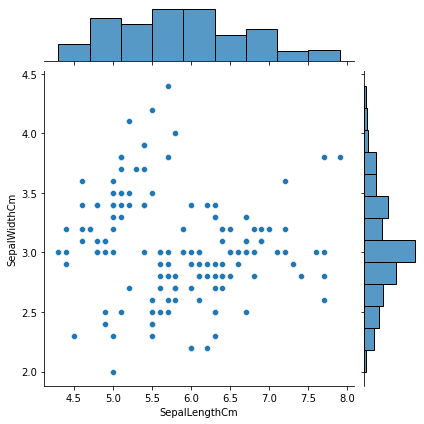

In [5]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

In [6]:
# Dropping the id and Species section
df_new=df.drop(['Species','Id'],axis=1)
df_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Seperating Testing and training data

In [7]:
X=df_new
y=df["Species"]
# Split Train and Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [8]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [9]:
y_train

96     Iris-versicolor
105     Iris-virginica
66     Iris-versicolor
0          Iris-setosa
122     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 100, dtype: object

### Training our model

In [10]:
# Train and Test data
tree_new=DecisionTreeClassifier(criterion='entropy')
tree_new.fit(X_train, y_train)
y_pred=tree_new.predict(X_test)

In [11]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [12]:
print(accuracy_score(y_pred,y_test))

0.98


In [13]:
dtree=list(df_new.columns.values)
dtree

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### Exploring our decision tree

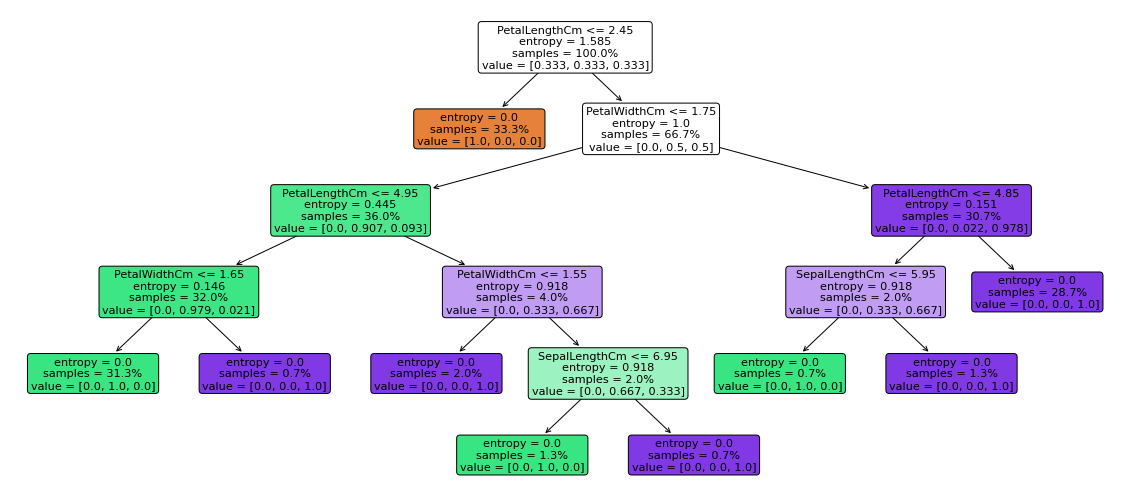

In [14]:
plt.figure(figsize=(20,9))
tree.plot_tree(tree_new.fit(X,y), feature_names=dtree, filled=True, precision=3, proportion=True,rounded=True)
plt.show()